# Customer Segmentation/Forecasting

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#loading dataset
df = pd.read_csv(r'C:\Users\KU_0373\Downloads\Retail_Transaction_Dataset 1.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


**CustomerID:** Unique identifier for each customer.  
**ProductID:** Unique identifier for each product.  
**Quantity:** The number of units purchased for a particular product.  
**Price:** The unit price of the product.  
**TransactionDate:** Date and time when the transaction occurred.  
**PaymentMethod:** The method used by the customer to make the payment.  
**StoreLocation:** The location where the transaction took place.  
**ProductCategory:** Category to which the product belongs.  
**DiscountApplied(%):** Percentage of the discount applied to the product.  
**TotalAmount:** Total amount paid for the transaction.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [9]:
df.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


In [10]:
df.isnull().sum()

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

There is **no null values** in the dataset

In [11]:
df.dtypes

CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object

**TransactionDate** column is an **"object"** data type, so changing it to **"datetime"**

In [12]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [13]:
pd.set_option('max_colwidth', None)

In [10]:
df['TransactionDate'].max()

Timestamp('2024-04-28 22:22:00')

In [14]:
df['StoreLocation'].head(10)

0                     176 Andrew Cliffs\nBaileyfort, HI 93354
1           11635 William Well Suite 809\nEast Kara, MT 19483
2        910 Mendez Ville Suite 909\nPort Lauraland, MO 99563
3        87522 Sharon Corners Suite 500\nLake Tammy, MO 76234
4            0070 Michelle Island Suite 143\nHoland, VA 80142
5            8492 Jonathan Drive\nNorth Robertshire, TN 67532
6                                  USNV Harrell\nFPO AA 62814
7          489 Juan Loop Apt. 093\nNorth Brettville, WV 72610
8    528 Justin Expressway Apt. 336\nCabreraborough, SD 17915
9                       189 Wright Mews\nMartinfurt, MO 75932
Name: StoreLocation, dtype: object

Upon the closer observation, I found that StoreLocation column contains states with two words abbreviations. 

In [15]:
df['State'] = [loc[-8:-6] for loc in df['StoreLocation']]

In [16]:
#dropping the StoreLocation column
df.drop('StoreLocation', axis = 1, inplace = True)

In [17]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,State
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,Books,18.677100,455.862764,HI
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,Home Decor,14.121365,258.306546,MT
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,Books,15.943701,212.015651,MO
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,Books,6.686337,461.343769,MO
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,Electronics,4.030096,626.030484,VA


In [15]:
df.nunique()

CustomerID             95215
ProductID                  4
Quantity                   9
Price                 100000
TransactionDate        91025
PaymentMethod              4
ProductCategory            4
DiscountApplied(%)    100000
TotalAmount            99998
State                     62
dtype: int64

There are **95,215** unique Customers

In [16]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


There are **no duplicate rows** in the dataset.

### Exploratory Data Analysis (EDA)

#### Sales Performance Across States (Top 10 states)

In [18]:
#sales perfromance of top 10 states
top_10_state = df.groupby('State')['TotalAmount'].sum().sort_values(ascending = False).apply(lambda x: "$ {:,.0f}".format(x)).reset_index().head(10)

In [19]:
# Create a dictionary mapping state abbreviations to their full names
state_names = {
    'AA': 'Armed Forces Americas',
    'AE': 'Armed Forces Europe',
    'AP': 'Armed Forces Pacific',
    'MH': 'Marshall Islands',
    'ME': 'Maine',
    'AR': 'Arkansas',
    'TX': 'Texas',
    'OR': 'Oregon',
    'IL': 'Illinois',
    'SD': 'South Dakota'
}

top_10_states_name = top_10_state.replace({'State': state_names})
top_10_states_name

,State,TotalAmount
0,Armed Forces Americas,"$ 913,937"
1,Armed Forces Europe,"$ 898,835"
2,Armed Forces Pacific,"$ 880,947"
3,Marshall Islands,"$ 403,259"
4,Maine,"$ 400,061"
5,Arkansas,"$ 393,846"
6,Texas,"$ 392,308"
7,Oregon,"$ 392,179"
8,Illinois,"$ 390,382"
9,South Dakota,"$ 389,232"


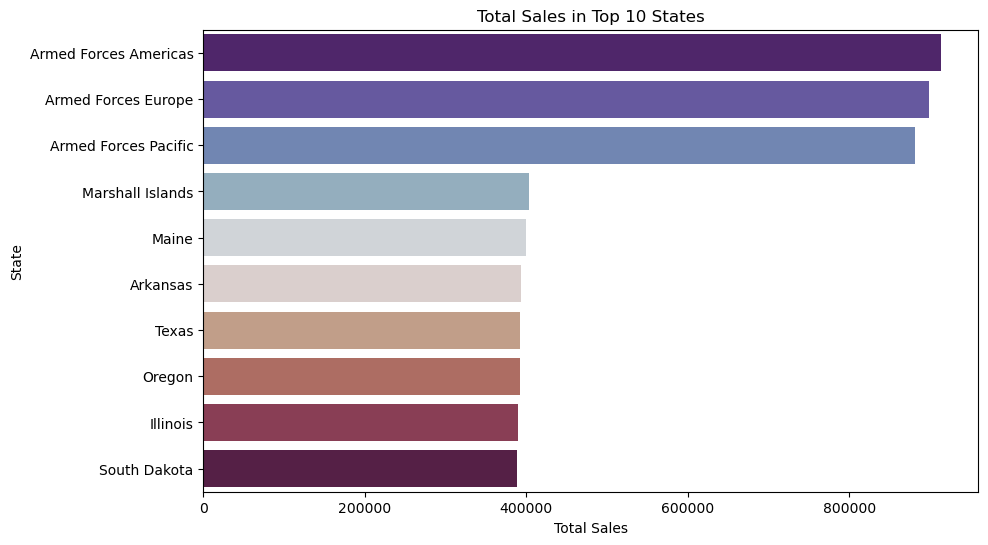

In [19]:
# Convert 'TotalAmount' column to numeric
top_10_states_name['TotalAmount'] = top_10_states_name['TotalAmount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states_name, x='TotalAmount', y='State', palette="twilight_shifted")
plt.title("Total Sales in Top 10 States")
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

**Observation:** From the above bar plot (Total Sales in Top 10 States):

- Sales in Armed Forces states exceed &#36;900,000.
- Sales in all other states are &#36;400,000 or lower.
.


#### Product Category Performance Across States (Top 10 states)

In [20]:
state_category_revenue = df.groupby(['State', 'ProductCategory'])['TotalAmount'].sum().sort_values(ascending=False).reset_index()
state_category_revenue_top_10 = state_category_revenue[state_category_revenue['State'].isin(top_10_state['State'])].replace({'State': state_names})
pivot_table = state_category_revenue_top_10.pivot_table(index='State', columns='ProductCategory', values='TotalAmount', aggfunc='sum').applymap(lambda x: "$ {:,.0f}".format(x))
pivot_table['Total Revenue'] = state_category_revenue_top_10.groupby('State')['TotalAmount'].sum().apply(lambda x: "$ {:,.0f}".format(x))
pivot_table = pivot_table.sort_values(by='Total Revenue', ascending=False)
pivot_table

ProductCategory,Books,Clothing,Electronics,Home Decor,Total Revenue
State,,,,,
Armed Forces Americas,"$ 240,433","$ 228,922","$ 226,716","$ 217,866","$ 913,937"
Armed Forces Europe,"$ 222,709","$ 219,856","$ 227,981","$ 228,288","$ 898,835"
Armed Forces Pacific,"$ 220,925","$ 234,484","$ 216,328","$ 209,210","$ 880,947"
Marshall Islands,"$ 98,530","$ 90,542","$ 104,304","$ 109,884","$ 403,259"
Maine,"$ 106,109","$ 100,184","$ 92,382","$ 101,386","$ 400,061"
Arkansas,"$ 98,008","$ 89,402","$ 103,861","$ 102,575","$ 393,846"
Texas,"$ 95,215","$ 103,089","$ 95,670","$ 98,334","$ 392,308"
Oregon,"$ 103,706","$ 103,381","$ 92,713","$ 92,380","$ 392,179"
Illinois,"$ 99,302","$ 91,403","$ 97,591","$ 102,086","$ 390,382"


**Observation:** From the above table (Product Category Performance Across States):

- **Armed Forces states** lead across all product categories, while sales in other states are generally lower by comparison.
- **Books** and **Clothing** consistently contribute significantly to total revenue across most states, reflecting their popularity and consumer demand.

#### Distribution of Customers Across State (Top 10 states)

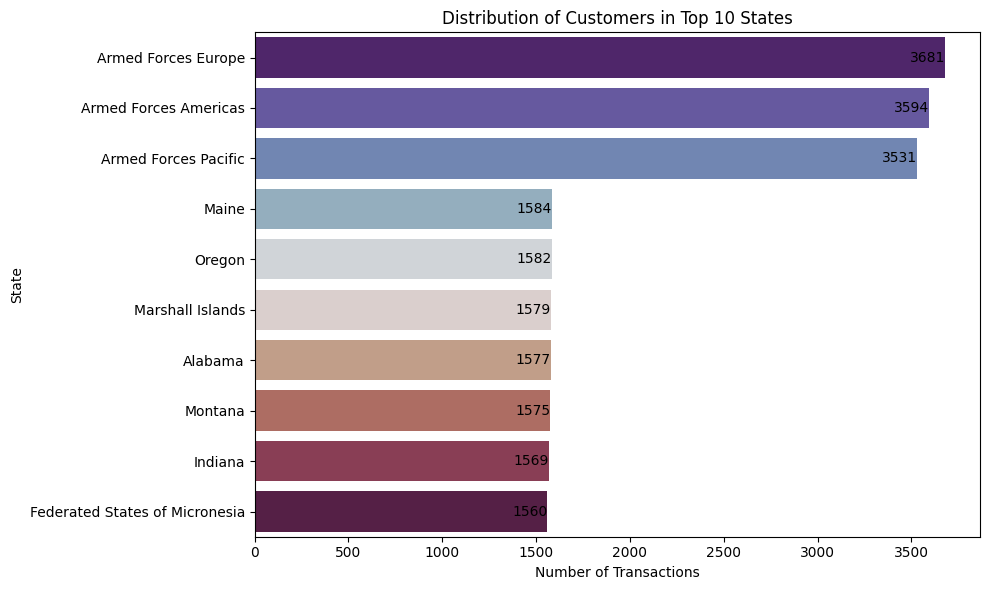

In [20]:
state_distribution = df['State'].value_counts().head(10)

# Create a dictionary to map state abbreviations to state names
state_names_trans = {
    'AE': 'Armed Forces Europe',
    'AA': 'Armed Forces Americas',
    'AP': 'Armed Forces Pacific',
    'ME': 'Maine',
    'OR': 'Oregon',
    'MH': 'Marshall Islands',
    'AL': 'Alabama',
    'MT': 'Montana',
    'IN': 'Indiana',
    'FM': 'Federated States of Micronesia' 
}

state_distribution.index = state_distribution.index.map(state_names_trans)
plt.figure(figsize=(10, 6))  
sns.barplot(x=state_distribution.values, y=state_distribution.index, palette='twilight_shifted')

for index, value in enumerate(state_distribution.values):
    plt.text(value, index, str(value), ha='right', va='center')  
plt.title('Distribution of Customers in Top 10 States')
plt.xlabel('Number of Transactions')  
plt.ylabel('State')
plt.tight_layout()  
plt.show()

**Observation:** From the above plot (Distribution of Customers Across States):

- **Armed Forces states** have the highest number of customers, while the number of customers in other states is less than half that of the Armed Forces states.


#### Average Basket Size Across States

**Average basket size (ABS)** is the average number of items sold per single transaction.

In [22]:
state_basket_size = df.groupby('State')['Quantity'].mean().sort_values(ascending=False).head(10)
state_basket_size

State
TX    5.215273
MO    5.175613
IN    5.138942
WI    5.107629
WA    5.099795
MA    5.099736
MH    5.094997
OR    5.090392
AR    5.089263
IL    5.086387
Name: Quantity, dtype: float64

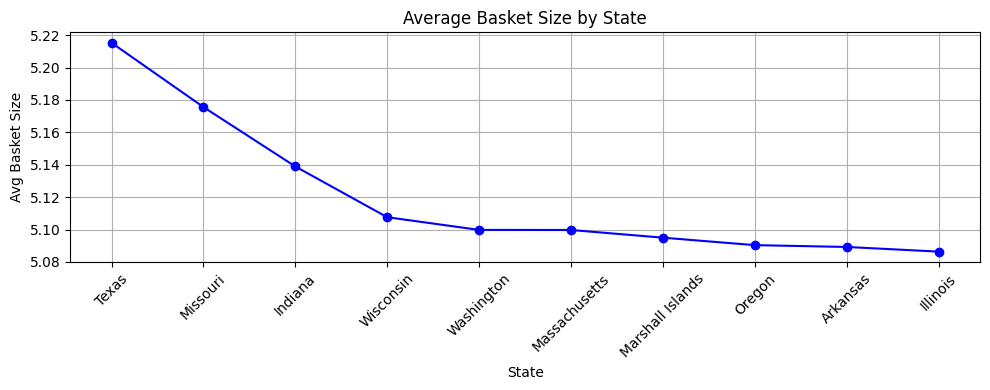

In [21]:
state_basket_size = df.groupby('State')['Quantity'].mean().sort_values(ascending=False).head(10)

state_names_basket = {
    'TX': 'Texas',
    'MO': 'Missouri',
    'IN': 'Indiana',
    'WI': 'Wisconsin',
    'WA': 'Washington',
    'MA': 'Massachusetts',
    'MH': 'Marshall Islands',
    'OR': 'Oregon',
    'AR': 'Arkansas',
    'IL': 'Illinois'
}

state_basket_size.index = state_basket_size.index.map(state_names_basket)

plt.figure(figsize=(10, 4))  
plt.plot(state_basket_size.index, state_basket_size.values, marker='o', color='blue', label='Line Plot')

plt.title('Average Basket Size by State')
plt.xlabel('State')
plt.ylabel('Avg Basket Size')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:** From the above plot (Average Basket Size by State):

- **Texas (TX)** has the highest average basket size at approximately 5.22 units.
- The average basket sizes across the states listed are relatively close to each other, indicating consistent consumer behavior in terms of purchasing quantities across these regions.

#### Average Basket Size Across Month

In [22]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df = df.sort_values(by='TransactionDate')

df['month'] = df['TransactionDate'].dt.month
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['month'] = df['month'].map(month_names)

In [29]:
average_basket_size = df.groupby('month')['Quantity'].mean()
average_basket_size

month
Apr    4.950764
Aug    5.011532
Dec    5.034344
Feb    4.965948
Jan    4.998478
Jul    5.007677
Jun    5.050346
Mar    5.031453
May    5.021578
Nov    5.040010
Oct    4.959039
Sep    5.036548
Name: Quantity, dtype: float64

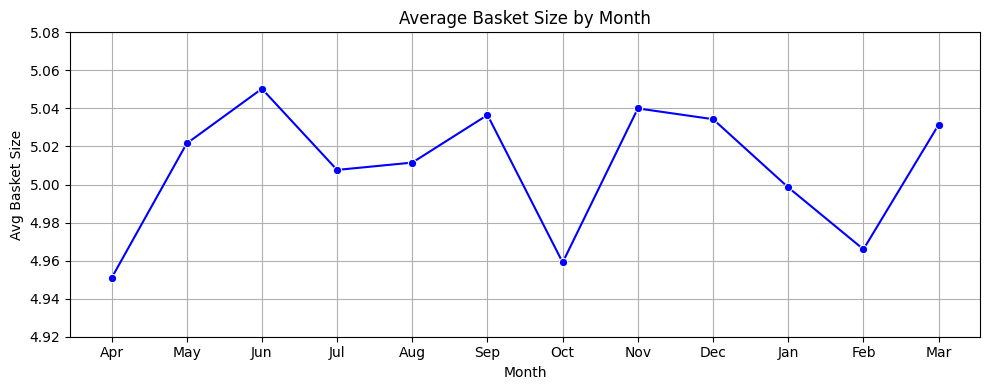

In [30]:
plt.figure(figsize=(10, 4))
custom_order = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
average_basket_size_ordered = average_basket_size.reindex(custom_order)
sns.lineplot(data=average_basket_size_ordered, marker='o', color='blue')
plt.title('Average Basket Size by Month')
plt.xlabel('Month')
plt.ylabel('Avg Basket Size')
plt.ylim(4.92, 5.08)
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:** From the above plot (Average Basket Size by Month):

- **June (Jun)** has the highest average basket size at approximately 5.05 units.
- Months like **September**, **November**, and **December** also show higher average basket sizes, suggesting increased consumer spending potentially due to seasonal factors.
- Conversely, months like **March**, **May**, and **July** exhibit relatively stable average basket sizes around 5.03 to 5.02 units, indicating consistent consumer purchasing behavior during these periods.

#### Average Purchase Frequency Across Month

**Average purchase frequency** across months refers to how often customers make purchases on average within each month. 

In [33]:
total_transactions = df['TransactionDate'].nunique() 
total_customers = df['CustomerID'].nunique() 
average_purchase_frequency = total_transactions / total_customers
print("Average Purchase Frequency:", round(average_purchase_frequency, 4))

Average Purchase Frequency: 0.956


In [34]:
monthly_transactions = df.groupby('month')
total_transactions_per_month = monthly_transactions['TransactionDate'].nunique()
total_customers_per_month = monthly_transactions['CustomerID'].nunique()
average_purchase_frequency_per_month = total_transactions_per_month / total_customers_per_month
average_purchase_frequency_per_month

month
Apr    0.917153
Aug    0.916460
Dec    0.914259
Feb    0.913984
Jan    0.916539
Jul    0.911614
Jun    0.911360
Mar    0.913859
May    0.915277
Nov    0.906901
Oct    0.915209
Sep    0.914766
dtype: float64

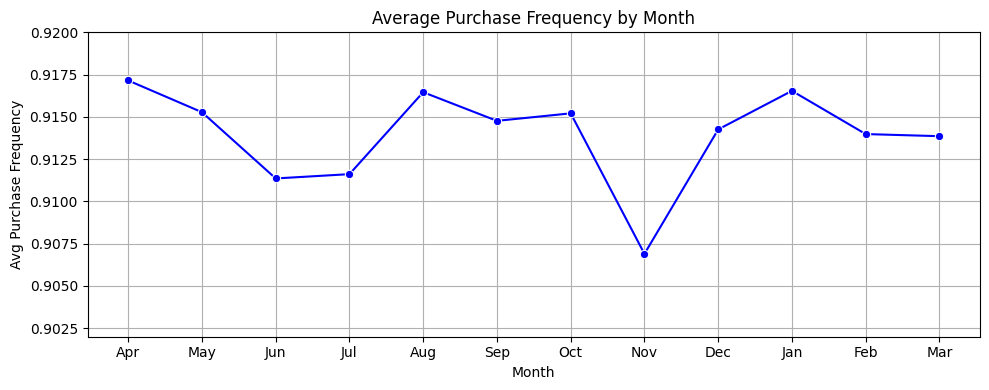

In [36]:
plt.figure(figsize=(10, 4))
average_purchase_frequency_ordered = average_purchase_frequency_per_month.reindex(custom_order)
sns.lineplot(data=average_purchase_frequency_ordered, marker='o', color='blue')
plt.title('Average Purchase Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Avg Purchase Frequency')
plt.ylim(.902, .920)
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation**: From the above plot (Average Purchase Frequency by Month):
- Months from **April (0.917)** to **August (0.916)** and **January (0.916)** show a consistent average purchase frequency around 0.916 to 0.917.
- **November (0.907)** has the **lowest average purchase frequency** among the months listed, suggesting that customers make fewer purchases on average during this month.
- Months like June (0.911) and July (0.912) exhibit stable purchase frequencies, slightly below the yearly average.
- December (0.914) shows a slightly lower average purchase frequency, possibly influenced by holiday spending patterns and end-of-year considerations.


**Sales Performance by Product Category**

In [39]:
Product_sales = df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)
Product_sales

ProductCategory
Books          126047
Electronics    125347
Clothing       125044
Home Decor     124491
Name: Quantity, dtype: int64

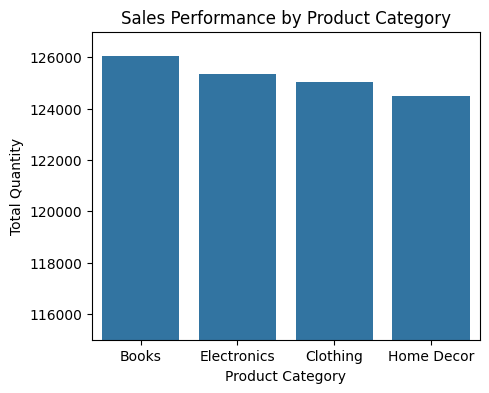

In [40]:
# Plotting a bar plot for Product_sales
plt.figure(figsize=(5, 4))
sns.barplot(x=Product_sales.index, y=Product_sales.values)
plt.title('Sales Performance by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.ylim(115000, 127000)
plt.show()

**Observation**: From the above plot (Sales Performance by Product Category):

- Sales in **Books** and **Electronics** categories are slightly higher compared to others.
- There is uniformity in sales across almost every category.

#### Revenue Distribution Across Product Category

In [44]:
total_revenue = sum(df['TotalAmount'])
rev_by_prod_per = (((df.groupby('ProductCategory')['TotalAmount'].sum() / total_revenue) * 100).round(2)).astype(str) + "%"

result_df = pd.DataFrame({
    'Product Category': rev_by_prod_per.index,
    'Total Revenue': df.groupby('ProductCategory')['TotalAmount'].sum().apply(lambda x: "${:,.2f}".format(x)).tolist(),
    'Revenue Percentage': rev_by_prod_per.tolist()
})
result_df

,Product Category,Total Revenue,Revenue Percentage
0,Books,"$6,257,837.04",25.2%
1,Clothing,"$6,205,502.35",24.99%
2,Electronics,"$6,196,734.76",24.95%
3,Home Decor,"$6,173,421.36",24.86%


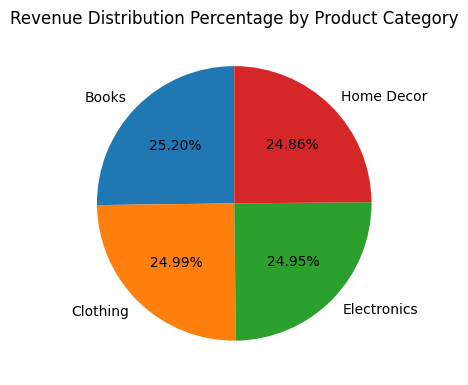

In [45]:
# Remove percentage symbol and convert values to float
rev_by_prod_float = rev_by_prod_per.str.rstrip('%').astype(float)

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(rev_by_prod_float, labels=rev_by_prod_float.index, autopct='%.2f%%', startangle=90)
plt.title('Revenue Distribution Percentage by Product Category')
plt.tight_layout()
plt.show()

**Observation**: From the above plot (Revenue Distribution Percentage by Product Category):

- All categories contribute approximately equally to total revenue, with **Books** contributing the highest at **25.2%**.
- Other categories collectively contribute slightly less than 25% to the total revenue.

#### Total Revenue Across Month

In [46]:
df = df.sort_values(by='TransactionDate')

df['month'] = df['TransactionDate'].dt.month
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map month numbers to month names
df['month'] = df['month'].map(month_names)

In [47]:
Total_Revenue = df.groupby('month')['TotalAmount'].sum().apply(lambda x: "$ {:,.0f}".format(x))
Total_Revenue

month
Apr    $ 1,939,190
Aug    $ 2,109,353
Dec    $ 2,125,651
Feb    $ 1,973,154
Jan    $ 2,128,345
Jul    $ 2,132,551
Jun    $ 2,066,365
Mar    $ 2,108,248
May    $ 2,099,576
Nov    $ 2,051,277
Oct    $ 2,049,451
Sep    $ 2,050,335
Name: TotalAmount, dtype: object

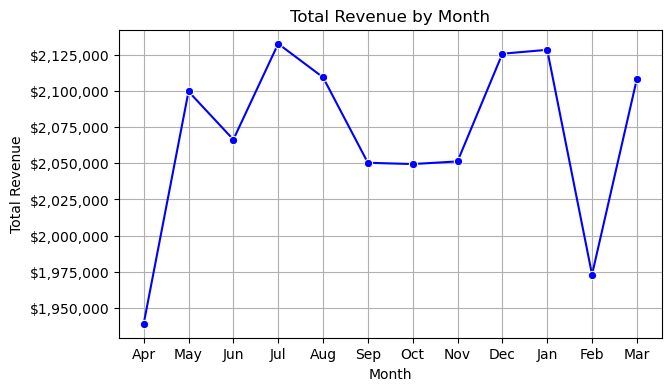

In [36]:
plt.figure(figsize=(7,4))
sns.lineplot(data=df, x='month', y='TotalAmount', marker='o', color='blue', estimator = sum, errorbar=None) 
formatter = ticker.FuncFormatter(lambda x, _: "${:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.grid(True)
plt.show()

**Observation**: From the above plot (Total Revenue Across Months):

- In **January (Jan)**, **March (Mar)**, **July (Jul)**, **August (Aug)**, and **December (Dec)**, revenue exceeds or equals &#36;2.1 million.
- **February (Feb)** and **April (Apr)** consistently show lower revenue, each less than &#36;1.98 million.
- The remaining months exhibit relatively stable revenue with minimal fluctuation throughout the year.


#### Total Revenue by Month and Product Category

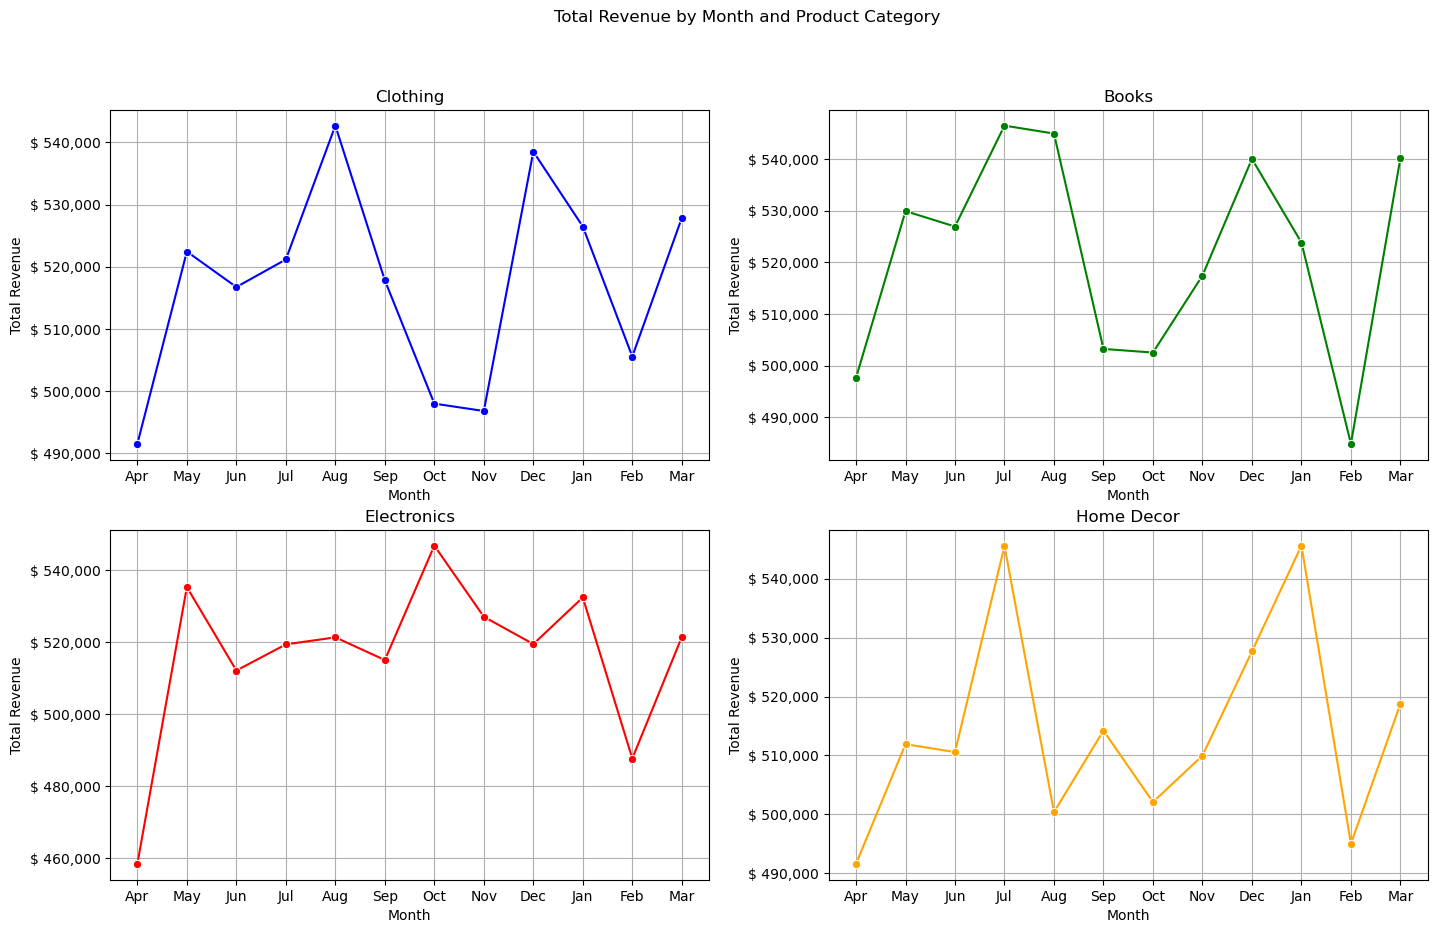

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))

fig.suptitle('Total Revenue by Month and Product Category')

categories = df['ProductCategory'].unique()
colors = ['blue', 'green', 'red', 'orange']  
for ax, category, color in zip(axs.flatten(), categories, colors):
    sns.lineplot(data=df[df['ProductCategory'] == category], x='month', y='TotalAmount', marker='o', ci=None, estimator=sum, ax=ax, color=color)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('$ {x:,.0f}'))
    ax.grid(True)
plt.show()

**Observation**: From the above plot (Total Revenue by Month and Product Category):

**Books:**
- Sales of **&#36;540,000** or more occur in **March, July, August, and December**.
- In **January, May, June, and November**, sales range between **&#36;518,000** and **&#36;530,000**.
- Lowest sales below **&#36;500,000** happen in **February and April**.

**Home Decor:**
- Highest sales were seen in **January and July**, exceeding **&#36;540,000**.
- Sales dropped below **&#36;500,000** in **February and April**.
- Sales in other months ranged between **&#36;500,000** and **&#36;530,000**.

**Electronics:**
- **October** recorded the highest sales, exceeding **&#36;540,000**.
- **February and April** were the lowest, with sales ranging from **&#36;460,000** to **&#36;485,000** respectively.
- Sales in other months ranged between **&#36;510,000** and **&#36;535,000**.

**Clothing:**
- **August** saw the highest sales, exceeding **&#36;540,000**.
- **April, October, and November** had the lowest sales, falling below **&#36;500,000**.
- Sales in other months averaged around **&#36;520,000**.


#### Average Sales by Day

In [49]:
df['day'] = df['TransactionDate'].dt.day_name()

# Group by 'DayOfWeek' and calculate the mean total amount
average_sales_per_day = df.groupby("day")['TotalAmount'].mean().rename('Average Sales').apply(lambda x: "$ {:,.2f}".format(x))
average_sales_per_day

day
Friday       $ 248.94
Monday       $ 245.00
Saturday     $ 249.50
Sunday       $ 247.38
Thursday     $ 251.32
Tuesday      $ 248.37
Wednesday    $ 247.81
Name: Average Sales, dtype: object

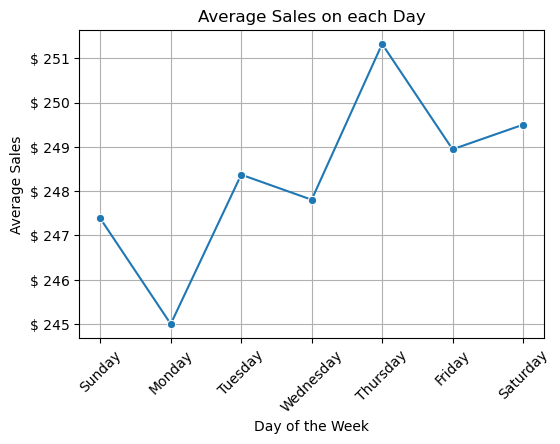

In [39]:
# Define the order of the days of the week
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='day', y='TotalAmount', estimator="mean", errorbar=None, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales on each Day')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('$ {x:,.0f}'))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observation**: From the above plot (Average Sales by Day):

- **Thursdays** show the highest average sales, exceeding **&#36;251**.
- **Mondays** have the lowest average sales at **&#36;245**.
- Average sales on other days range between **&#36;247.4** and **&#36;249.5**.

#### Average Daily Sales by Product Category

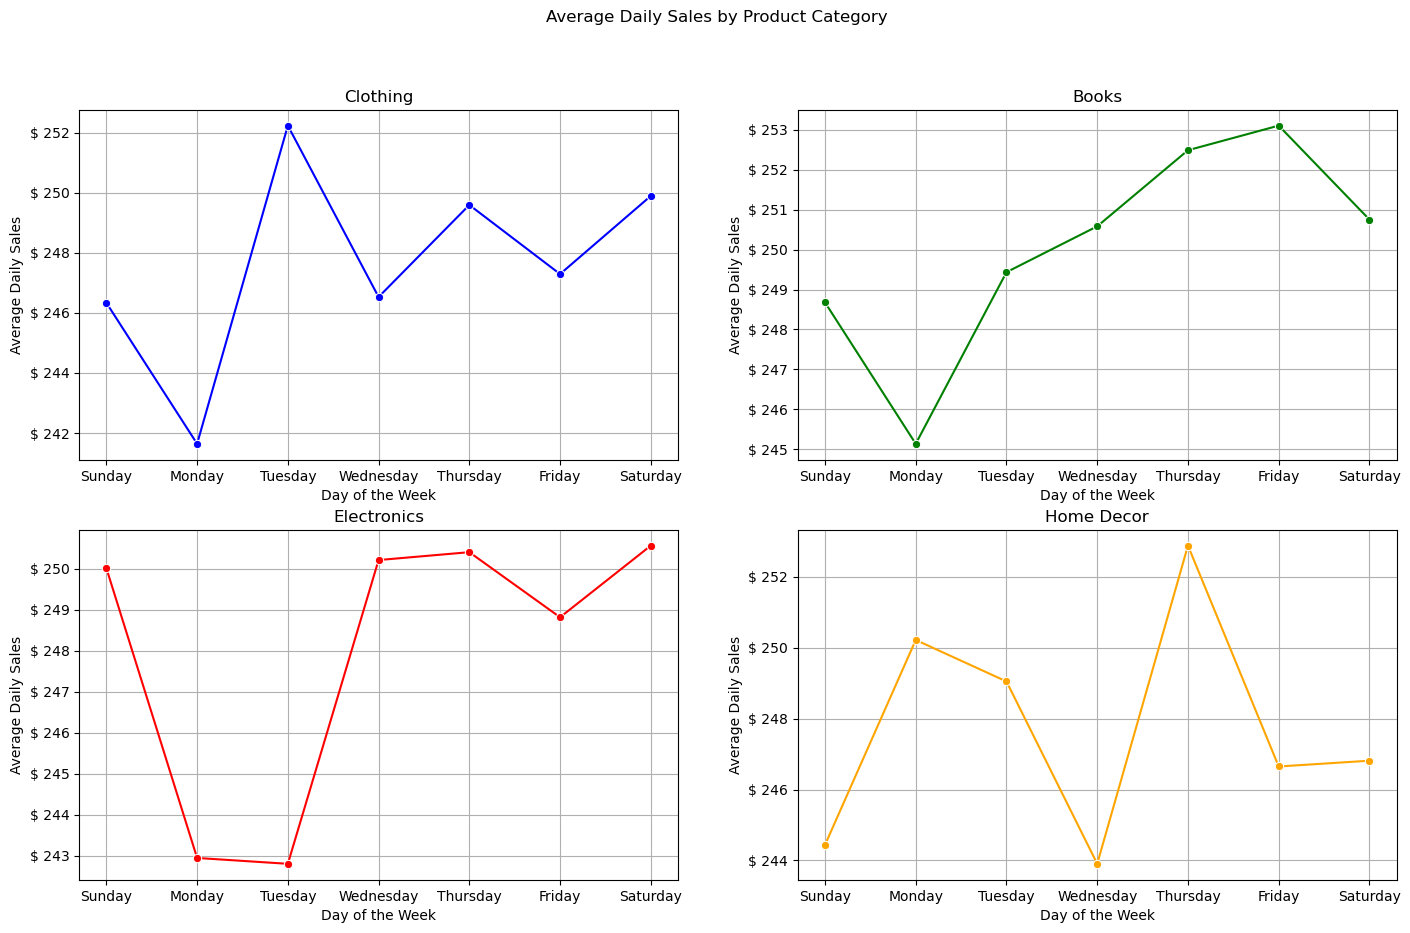

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))
fig.suptitle('Average Daily Sales by Product Category')

categories = df['ProductCategory'].unique()
colors = ['blue', 'green', 'red', 'orange']  
for ax, category, color in zip(axs.flatten(), categories, colors):
    sns.lineplot(data=df[df['ProductCategory'] == category], x='day', y='TotalAmount', marker='o', ci=None, estimator='mean', ax=ax, color=color)
    ax.set_title(category)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Average Daily Sales')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('$ {x:,.0f}'))
    ax.grid(True)
plt.show()

**Observation**: From the above plot (Average Daily Sales by Product Category):

**Books:**
- From **Monday to Friday**, there's a consistent increase in sales from **&#36;245** to **&#36;253**. 
- Sales decline to **$249** over the weekend **(Saturday and Sunday)**.

**Home Decor:**
- Sales started at **&#36;250** on **Monday**, gradually decreased to **&#36;244** approaching **Wednesday**. 
- Increased sharply to **&#36;252** on **Thursday**, followed by another gradual decrease to **&#36;244** on **Friday, Saturday, and Sunday**.

**Electronics:**
- Lowest average sales occurred on **Monday and Tuesday** at **&#36;243**. 
- Sharp increase on **Wednesday** to **&#36;250**, remaining consistent through **Sunday**.

**Clothing:**
- Lowest sales on **Monday** at **&#36;242**, increased to **&#36;252** on **Tuesday**. Remaining days averaged **&#36;248**.


#### Customer Spending Trends and Patterns

In [41]:
print(f'Average Price per transaction : {df["TotalAmount"].mean().round(2)}')
print(f'Average Quantity per transaction : {df["Quantity"].mean().round(1)}')

Average Price per transaction : 248.33
Average Quantity per transaction : 5.0


In [42]:
df.groupby('ProductCategory').agg(
    Average_Quantity=('Quantity', lambda x: round(x.mean(), 1)),
    Average_Price=('TotalAmount', lambda x: round(x.mean(), 2)))

,Average_Quantity,Average_Price
ProductCategory,,
Books,5.0,250.00
Clothing,5.0,247.67
Electronics,5.0,247.97
Home Decor,5.0,247.70


In [43]:
df.groupby('PaymentMethod')['TotalAmount'].mean().round(2)

PaymentMethod
Cash           248.21
Credit Card    247.80
Debit Card     249.21
PayPal         248.13
Name: TotalAmount, dtype: float64

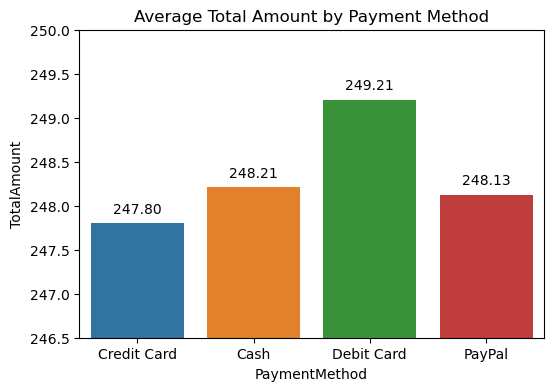

In [44]:
plt.figure(figsize=(6, 4))  
ax = sns.barplot(data=df, x='PaymentMethod', y='TotalAmount', ci=None)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.ylim(246.5, 250)
plt.title('Average Total Amount by Payment Method')
plt.show()

**Observation**: From the above plot(Average Total Amount by Payment Method):

- There is not a significant difference between payment methods. However, **Debit Card** is typically used when payments average around **&#36;249.21**.
- **Cash** and **PayPal** are frequently used for average payments around **&#36;248.17**.
- **Credit cards** have been used for lower payments, averaging around **&#36;247.80**.

#### Payment Method Distribution

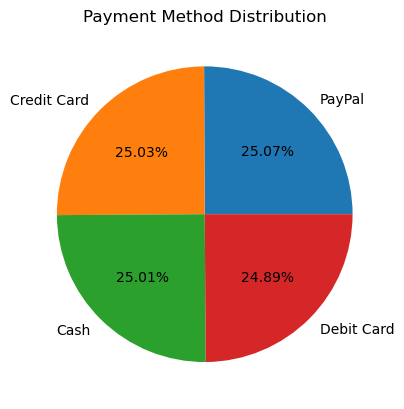

In [45]:
payment_method_preference = df['PaymentMethod'].value_counts()
plt.pie(payment_method_preference.values, labels=payment_method_preference.index, autopct='%1.2f%%')
plt.title('Payment Method Distribution')
plt.show()

**Observation**: From the above plot(Payment Method Distribution):

- There is not a significant difference between payment methods preference. 
- **Paypal, Credit card and Cash** are the preference by more than **25%** of people.

#### Payment Method Preference Across States

In [59]:
state_revenue = df.groupby('State')['TotalAmount'].sum()
state_category_revenue = df.groupby(['State', 'PaymentMethod'])['TotalAmount'].sum()
state_payment_method_percentage = (state_category_revenue / state_revenue).reset_index()
state_payment_method_percentage_top_10 = state_payment_method_percentage[state_payment_method_percentage['State'].isin(top_10_state['State'])].replace({'State': state_names})
pivot_table = state_payment_method_percentage_top_10.pivot_table(index='State', columns='PaymentMethod', values='TotalAmount', aggfunc='mean').applymap(lambda x: "{:.2%}".format(x))
pivot_table

PaymentMethod,Cash,Credit Card,Debit Card,PayPal
State,,,,
Arkansas,22.71%,25.77%,27.37%,24.15%
Armed Forces Americas,26.16%,25.45%,25.90%,22.48%
Armed Forces Europe,24.71%,25.41%,25.36%,24.51%
Armed Forces Pacific,25.92%,24.69%,23.50%,25.90%
Illinois,23.30%,25.43%,24.91%,26.35%
Maine,25.27%,24.41%,24.62%,25.70%
Marshall Islands,25.95%,23.84%,23.76%,26.46%
Oregon,25.17%,23.92%,25.87%,25.04%
South Dakota,26.74%,24.85%,25.01%,23.41%


**Observation**: From the above table (Payment Method Preference Across States):

- The data reveals a balanced distribution of payment methods without a clear dominant method across the dataset.
- This suggests that consumers nationwide do not overwhelmingly favor one payment method over others.

#### Correlation Between Total Amount and Discount Applied

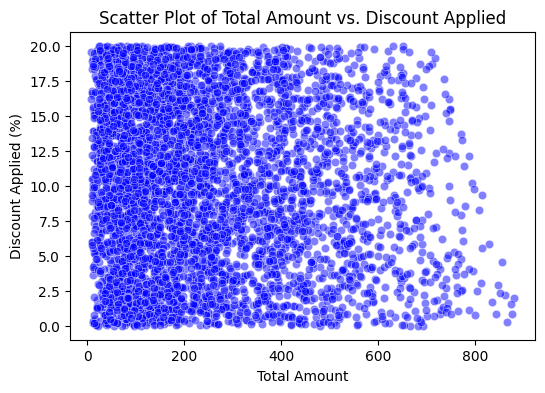

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df.sample(frac=0.05), x='TotalAmount', y='DiscountApplied(%)', alpha=0.5, color='blue')
plt.title('Scatter Plot of Total Amount vs. Discount Applied')
plt.xlabel('Total Amount')
plt.ylabel('Discount Applied (%)')
plt.show()

**Observation**: From the above plot (Correlation Between Total Amount and Discount Applied):

- There is a **low negative correlation** between Total Amount and Discount Applied.
- As discounts increase, there is a slight tendency for the Total Amount to decrease.

#### Total Quantity Across Month

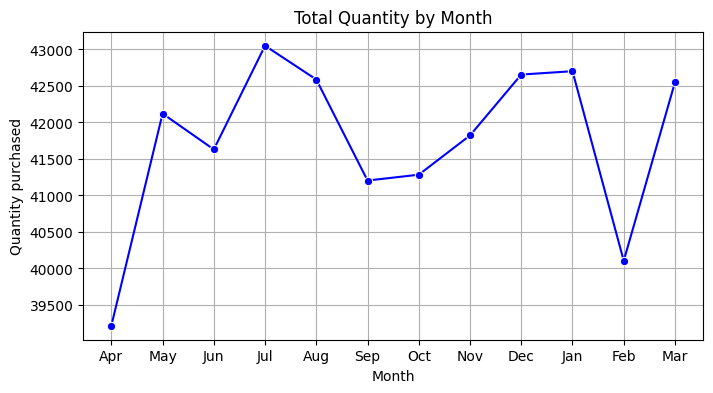

In [61]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='month', y='Quantity', marker='o', color='blue', estimator = 'sum', ci =None) 
plt.xlabel('Month')
plt.ylabel('Quantity purchased')
plt.title('Total Quantity by Month')
plt.grid(True)
plt.show()

**Observation**: From the above plot (Total Quantity Across Month):

- Total quantities purchased range between **42,000 to 43,000** in **peak months** like **January, March, May, July, August, and December**.
- **February** sees a **slight drop** with purchases around **40,000**, and **April** shows lower buying trends with quantities falling below **39,300**.
- Towards the end of the year, **starting from September, the quantity starts increasing consistently**, reaching about 41,200 in September and rising further in the last four months of the year.




### Recommendations

1. **Product Category**

- **Books**: Focus marketing efforts and inventory planning to capitalize on peak sales months (March, July, August, December). Consider promotional strategies or special offers during months like January, May, June, and November to potentially boost sales towards the higher end.

- **Home Decor**: Concentrate on maintaining or increasing sales during high-performing months like January and July. Implement targeted marketing campaigns or seasonal promotions to counteract the sales drop in February and April.

- **Electronics**: Focus on promoting products during the peak month of October and consider offering special discounts or bundles to attract more customers. Maintain competitive pricing and promotional activities during other months to sustain momentum.

- **Clothing**: Exploit the peak sales month of August, by showcasing new collections or running seasonal promotions. Address the sales challenges in April, October, and November, with targeted marketing campaigns or clearance events.

2. **Daily Sales**

  - Implementing promotions, flash sales, bundles on the peak sales days (Thursdays) to maximize overall sales.
  - Launch exclusive discounts or promotions specifically for Mondays to incentivize customers to make purchases at the beginning of the week.

3. **Payment Method**

- Consider offering exclusive discounts or cashback incentives for using debit cards, as they are the preferred method for higher average payments.
- Continuously monitor payment method trends and preferences across different demographics or geographic regions. Use these insights to adapt marketing strategies and operational practices to better align with customer expectations and behaviors.
- Explore partnerships with payment providers or financial institutions to offer exclusive deals or rewards tied to specific payment methods.
- Since there isn't a significant difference in average payment amounts, ensure that all payment methods are prominently displayed and accepted. 

4. **Promotional Activities**

- Launch targeted promotions or discounts aligned with peak buying months to stimulate demand.
- Offer early bird discounts or incentives ahead of peak seasons to encourage early purchases.
- Conduct clearance sales or promotions for slow-moving inventory during off-peak periods to maintain cash flow and clear space for new stock.
- Implement loyalty programs offering rewards or exclusive benefits during high and low seasons to incentivize repeat purchases.

5. **Inventory Management**

- Utilize historical sales data to forecast demand patterns for each month or season.
- Increase inventory levels strategically before peak buying months to ensure adequate stock availability.
- Implement just-in-time inventory practices to minimize carrying costs and avoid overstocking during slower periods.

6. **Targeted Marketing**

- Allocate additional marketing resources and campaigns specifically targeting Armed Forces states, as they represent significant sales potential.
- Implement strategies to foster long-term customer relationships in Armed Forces states, such as personalized customer service, exclusive offers, or events.
- Gather and analyze customer feedback through surveys, reviews, and social media interactions.

### Model Building

### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

In [64]:
df['TransactionDate'] = df['TransactionDate'].dt.date

In [65]:
agg_df = df.groupby('TransactionDate').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'DiscountApplied(%)': 'mean',
    'month': 'first',       
    'DayOfWeek': 'first'   
}).reset_index()

In [66]:
X = agg_df[['Quantity', 'DiscountApplied(%)', 'month', 'DayOfWeek']]
y = agg_df['TotalAmount']

In [67]:
model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'mape: {mape}')

Root Mean Squared Error: 2225.3922923446485
R^2 Score: 0.8797546770395692
mape: 2.747618999944799


In [68]:
forecast_dates = pd.date_range(start='2024-04-28', end='2024-05-28')
forecast_X = pd.DataFrame({
    'Quantity': [agg_df['Quantity'].mean()] * len(forecast_dates),  
    'DiscountApplied(%)': [agg_df['DiscountApplied(%)'].mean()] * len(forecast_dates),  
    'month': forecast_dates.month,
    'DayOfWeek': forecast_dates.dayofweek
})

forecast_y = model.predict(forecast_X)

ln_df = pd.DataFrame({
    'Date': forecast_dates,
    'TotalAmount': forecast_y
})

print("\nForecasted TotalAmount:")
print(ln_df)


Forecasted TotalAmount:
         Date   TotalAmount
0  2024-04-28  67982.849243
1  2024-04-29  67748.857069
2  2024-04-30  67787.855764
3  2024-05-01  67820.765610
4  2024-05-02  67859.764306
5  2024-05-03  67898.763001
6  2024-05-04  67937.761697
7  2024-05-05  67976.760393
8  2024-05-06  67742.768219
9  2024-05-07  67781.766914
10 2024-05-08  67820.765610
11 2024-05-09  67859.764306
12 2024-05-10  67898.763001
13 2024-05-11  67937.761697
14 2024-05-12  67976.760393
15 2024-05-13  67742.768219
16 2024-05-14  67781.766914
17 2024-05-15  67820.765610
18 2024-05-16  67859.764306
19 2024-05-17  67898.763001
20 2024-05-18  67937.761697
21 2024-05-19  67976.760393
22 2024-05-20  67742.768219
23 2024-05-21  67781.766914
24 2024-05-22  67820.765610
25 2024-05-23  67859.764306
26 2024-05-24  67898.763001
27 2024-05-25  67937.761697
28 2024-05-26  67976.760393
29 2024-05-27  67742.768219
30 2024-05-28  67781.766914


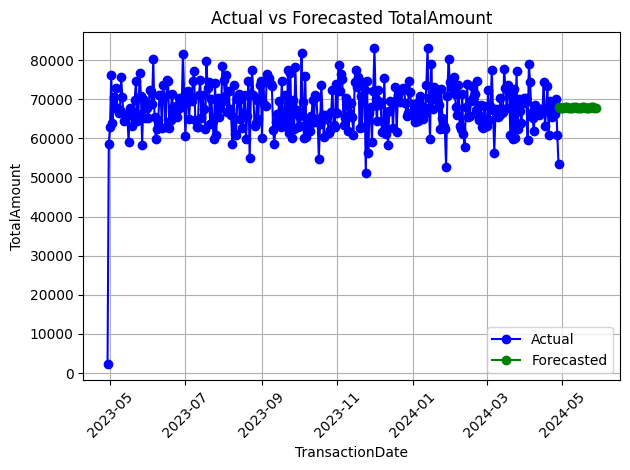

In [69]:
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(ln_df['Date'], ln_df['TotalAmount'], marker='o', linestyle='-', color='g', label='Forecasted')

plt.title('Actual vs Forecasted TotalAmount')
plt.xlabel('TransactionDate')
plt.ylabel('TotalAmount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(X, y)
y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'MAPE: {mape}')

Root Mean Squared Error: 1247.6482548322342
R^2 Score: 0.9622045638824407
MAPE: 3.0354339621437543


In [71]:
forecast_dates = pd.date_range(start='2024-04-28', end='2024-05-28')

forecast_X = pd.DataFrame({
    'Quantity': [agg_df['Quantity'].mean()] * len(forecast_dates),  
    'DiscountApplied(%)': [agg_df['DiscountApplied(%)'].mean()] * len(forecast_dates),  
    'month': forecast_dates.month,
    'DayOfWeek': forecast_dates.dayofweek
})

forecast_y = model.predict(forecast_X)

rf_df = pd.DataFrame({
    'Date': forecast_dates,
    'TotalAmount': forecast_y
})

print("\nForecasted TotalAmount:")
print(rf_df)


Forecasted TotalAmount:
         Date   TotalAmount
0  2024-04-28  67913.966187
1  2024-04-29  68454.825984
2  2024-04-30  68453.339016
3  2024-05-01  68207.524558
4  2024-05-02  67796.911854
5  2024-05-03  67774.762219
6  2024-05-04  68077.952991
7  2024-05-05  67889.070135
8  2024-05-06  68269.802081
9  2024-05-07  68331.880389
10 2024-05-08  68207.524558
11 2024-05-09  67796.911854
12 2024-05-10  67774.762219
13 2024-05-11  68077.952991
14 2024-05-12  67889.070135
15 2024-05-13  68269.802081
16 2024-05-14  68331.880389
17 2024-05-15  68207.524558
18 2024-05-16  67796.911854
19 2024-05-17  67774.762219
20 2024-05-18  68077.952991
21 2024-05-19  67889.070135
22 2024-05-20  68269.802081
23 2024-05-21  68331.880389
24 2024-05-22  68207.524558
25 2024-05-23  67796.911854
26 2024-05-24  67774.762219
27 2024-05-25  68077.952991
28 2024-05-26  67889.070135
29 2024-05-27  68269.802081
30 2024-05-28  68331.880389


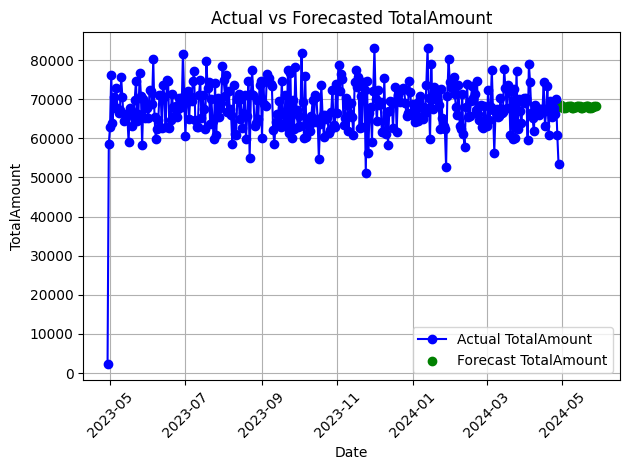

In [72]:
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'], marker='o', linestyle='-', color='b', label='Actual TotalAmount')
plt.scatter(rf_df['Date'], rf_df['TotalAmount'], color='g', label='Forecast TotalAmount')
plt.title('Actual vs Forecasted TotalAmount')
plt.xlabel('Date')
plt.ylabel('TotalAmount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### ARIMA

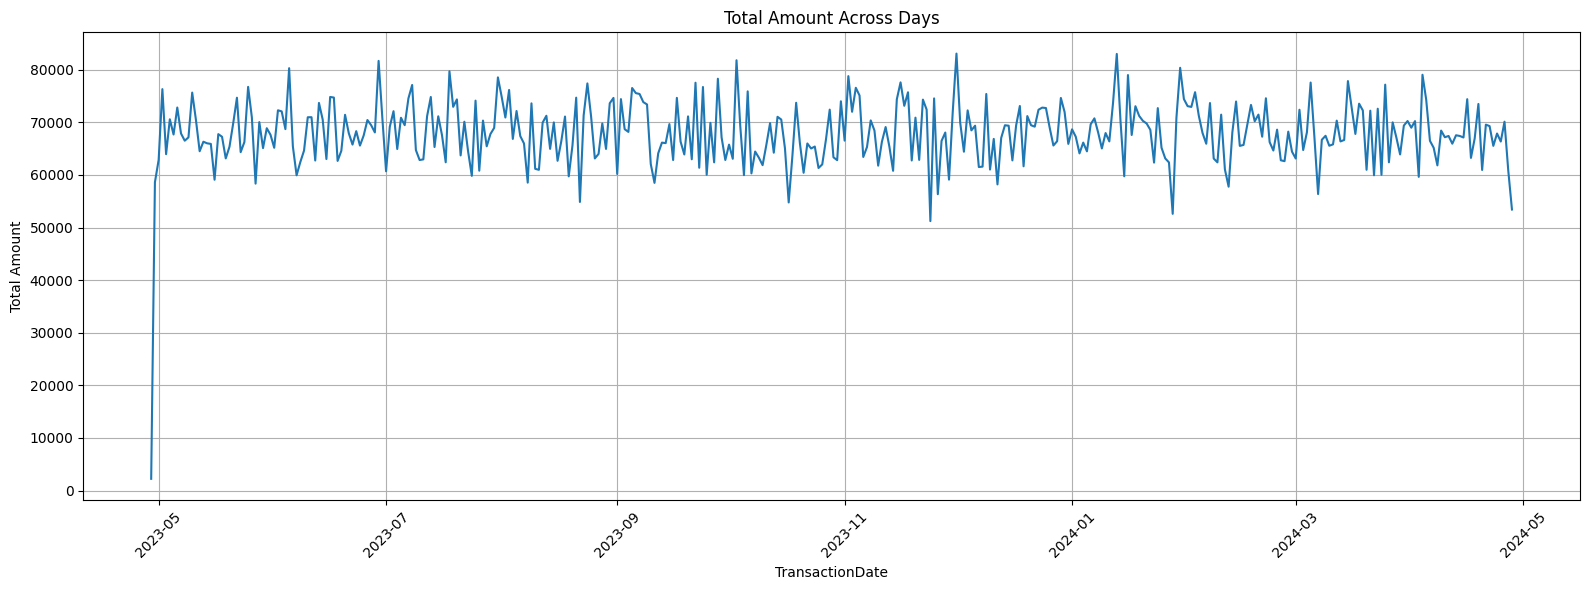

In [73]:
agg_df = df.groupby('TransactionDate').agg({
    'TotalAmount': 'sum'}).reset_index()

plt.figure(figsize=(16, 6))
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'])
plt.xlabel('TransactionDate')
plt.ylabel('Total Amount')
plt.title('Total Amount Across Days')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

##### Check the Stationality by ADF(Augmented Dickey-Fuller)

In [74]:
from statsmodels.tsa.stattools import adfuller
agg_df = agg_df.sort_values(by='TransactionDate')
adf_result = adfuller(agg_df['TotalAmount'])

# Extract and print ADF test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -21.951525357142884
p-value: 0.0
Critical Values:
	1%: -3.4483935212959844
	5%: -2.8694912343676497
	10%: -2.571005879151811


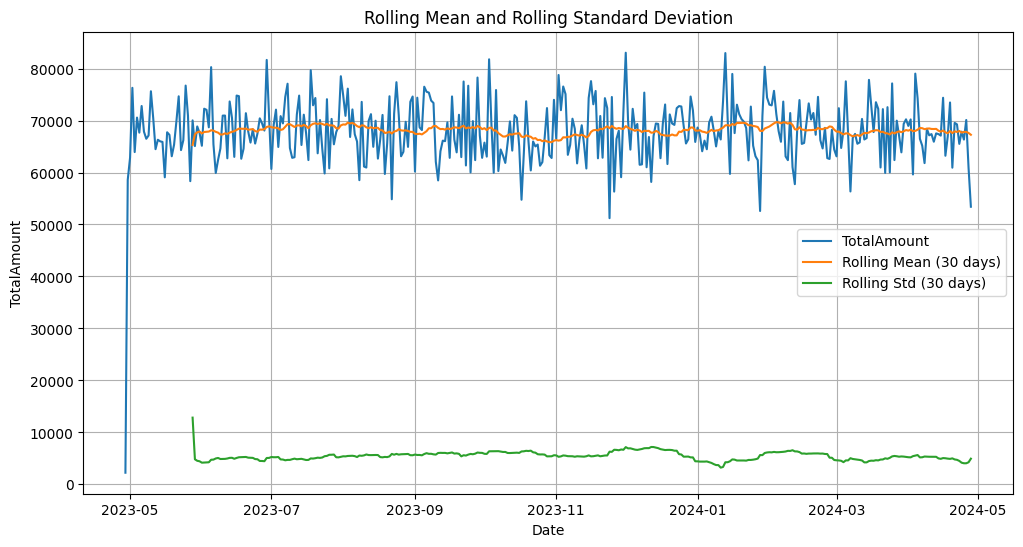

In [75]:
window = 30  
roll_mean = agg_df['TotalAmount'].rolling(window=window).mean()
roll_std = agg_df['TotalAmount'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'], label='TotalAmount')
plt.plot(agg_df['TransactionDate'], roll_mean, label=f'Rolling Mean ({window} days)')
plt.plot(agg_df['TransactionDate'], roll_std, label=f'Rolling Std ({window} days)')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('TotalAmount')
plt.legend()
plt.grid(True)
plt.show()

The highly negative ADF statistic indicates that the time series is **stationary**.

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [77]:
agg_df = agg_df.sort_values(by='TransactionDate')

In [78]:
agg_df['TotalAmount_diff'] = agg_df['TotalAmount'].diff().fillna(0)

<Figure size 1200x600 with 0 Axes>

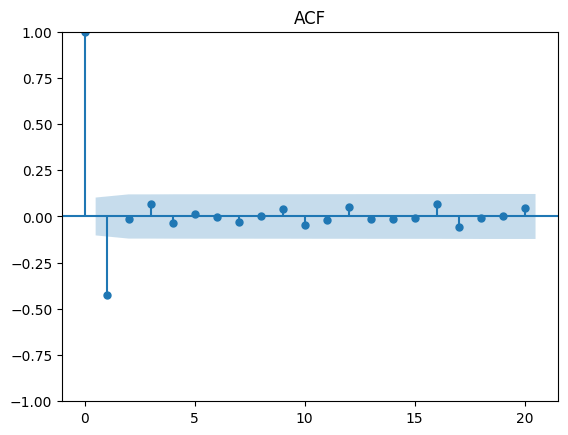

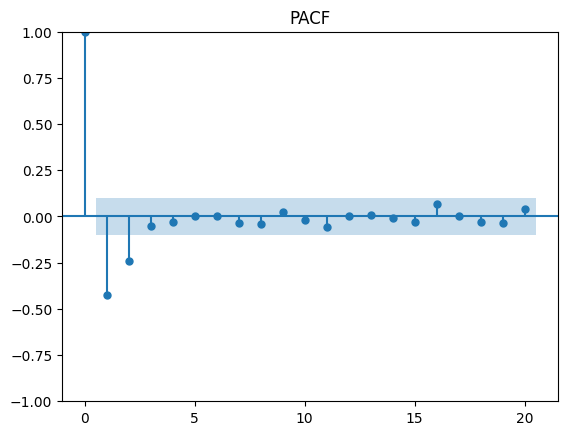

In [79]:
plt.figure(figsize=(12, 6))
plot_acf(agg_df['TotalAmount_diff'], lags=20, title='ACF')
plot_pacf(agg_df['TotalAmount_diff'], lags=20, title='PACF')
plt.show()

In [80]:
train_size = 0.8
split_index = int(len(agg_df) * train_size)

train_data = agg_df['TotalAmount'].iloc[:split_index]
test_data = agg_df['TotalAmount'].iloc[split_index:]

In [81]:
model_arima = ARIMA(train_data, order=(1, 2, 2))  
arima_result = model_arima.fit()

In [82]:
forecast_steps = len(test_data)
forecast = arima_result.forecast(steps=forecast_steps)

y_true = test_data
y_pred = forecast

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Root Mean Squared Error (RMSE): 5883.246404035774
Mean Absolute Percentage Error (MAPE): 7.389382210431441


In [83]:
forecast_steps = len(forecast_dates)  
forecast = arima_result.forecast(steps=forecast_steps)

arima_df = pd.DataFrame({
    'Date': forecast_dates,
    'TotalAmount': forecast
})

print("\nForecasted TotalAmount:")
print(arima_df)


Forecasted TotalAmount:
          Date   TotalAmount
292 2024-04-28  69500.032378
293 2024-04-29  69641.575439
294 2024-04-30  69670.871276
295 2024-05-01  69702.915755
296 2024-05-02  69734.892927
297 2024-05-03  69766.871747
298 2024-05-04  69798.850527
299 2024-05-05  69830.829308
300 2024-05-06  69862.808089
301 2024-05-07  69894.786869
302 2024-05-08  69926.765650
303 2024-05-09  69958.744431
304 2024-05-10  69990.723212
305 2024-05-11  70022.701992
306 2024-05-12  70054.680773
307 2024-05-13  70086.659554
308 2024-05-14  70118.638335
309 2024-05-15  70150.617115
310 2024-05-16  70182.595896
311 2024-05-17  70214.574677
312 2024-05-18  70246.553458
313 2024-05-19  70278.532238
314 2024-05-20  70310.511019
315 2024-05-21  70342.489800
316 2024-05-22  70374.468580
317 2024-05-23  70406.447361
318 2024-05-24  70438.426142
319 2024-05-25  70470.404923
320 2024-05-26  70502.383703
321 2024-05-27  70534.362484
322 2024-05-28  70566.341265


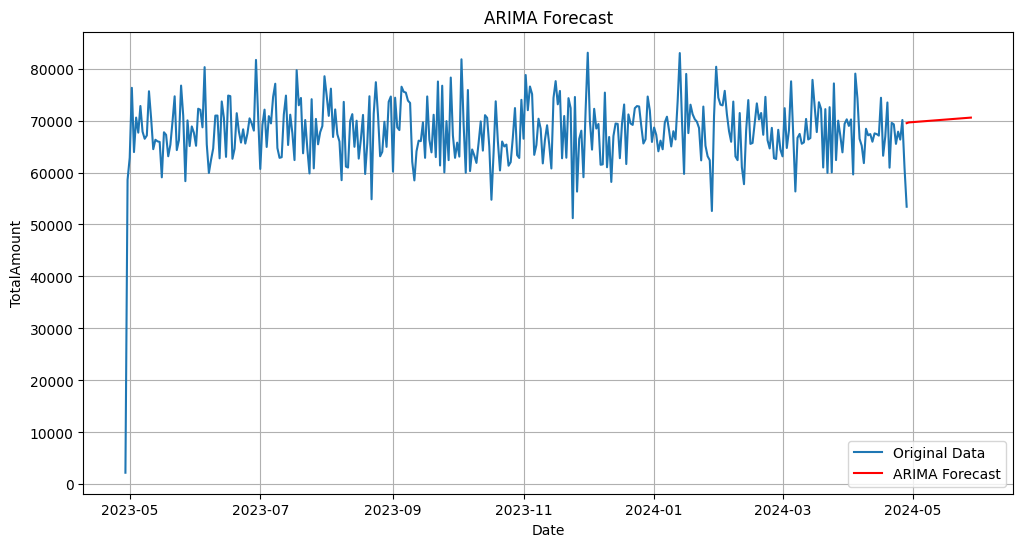

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'], label='Original Data')
plt.plot(arima_df['Date'], arima_df['TotalAmount'], color='red', label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('TotalAmount')
plt.legend()
plt.grid(True)
plt.show()

### Exponential Smoothing

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
es_result = model_es.fit()

C:\Users\KU_0373\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [86]:
forecast_steps = len(test_data)
forecast = es_result.forecast(steps=forecast_steps)

y_true = test_data
y_pred = forecast

rmse = np.sqrt(mean_squared_error(test_data, forecast))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, forecast)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 5064.892552898928
Mean Absolute Percentage Error (MAPE): 5.94%


In [87]:
forecast_steps = len(forecast_dates)  
forecast = es_result.forecast(steps=forecast_steps)

exp_df = pd.DataFrame({
    'Date': forecast_dates,
    'TotalAmount': forecast
})

print("\nForecasted TotalAmount:")
print(exp_df)


Forecasted TotalAmount:
          Date   TotalAmount
292 2024-04-28  68511.326426
293 2024-04-29  66965.863672
294 2024-04-30  68601.139080
295 2024-05-01  67775.907895
296 2024-05-02  68710.360243
297 2024-05-03  68249.548116
298 2024-05-04  68907.393706
299 2024-05-05  68902.466203
300 2024-05-06  69338.281971
301 2024-05-07  70065.773599
302 2024-05-08  68578.171807
303 2024-05-09  67055.241017
304 2024-05-10  68549.179909
305 2024-05-11  67003.717156
306 2024-05-12  68638.992564
307 2024-05-13  67813.761379
308 2024-05-14  68748.213727
309 2024-05-15  68287.401600
310 2024-05-16  68945.247190
311 2024-05-17  68940.319686
312 2024-05-18  69376.135455
313 2024-05-19  70103.627083
314 2024-05-20  68616.025290
315 2024-05-21  67093.094500
316 2024-05-22  68587.033393
317 2024-05-23  67041.570640
318 2024-05-24  68676.846048
319 2024-05-25  67851.614862
320 2024-05-26  68786.067211
321 2024-05-27  68325.255083
322 2024-05-28  68983.100674


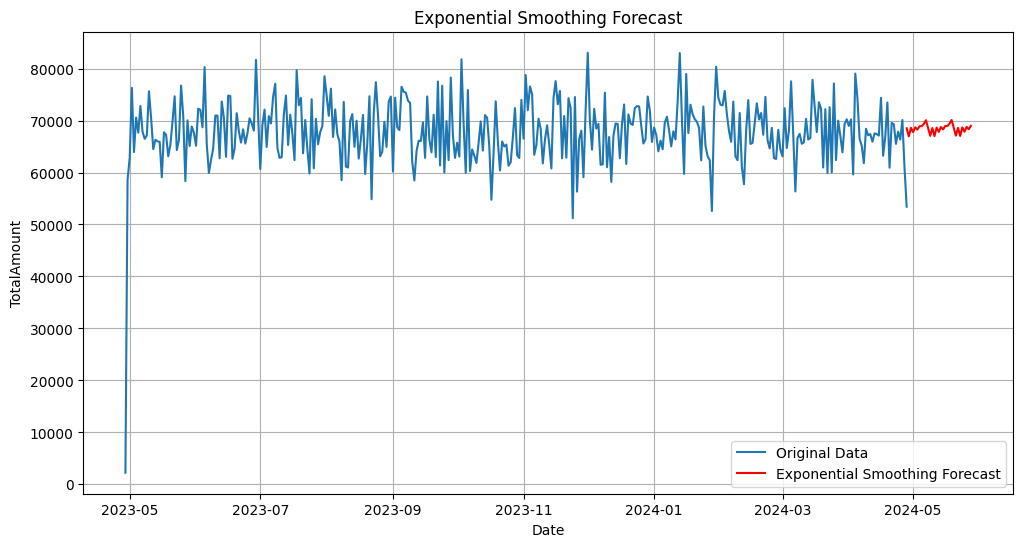

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(agg_df['TransactionDate'], agg_df['TotalAmount'], label='Original Data')
plt.plot(exp_df['Date'], exp_df['TotalAmount'], color='red', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('TotalAmount')
plt.legend()
plt.grid(True)
plt.show()